# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

This data, taken from the College Board, gives the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001. (Source: Project-01 readme.md file)

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The csv has 51 rows of data (each unique US state is accounted for in the data) and 4 columns. The data looks complete. There are no Null or NaN values. All cells of dataset contain values. Other than some potential outliers, there are no obvious issues with the observations.

##### 3. Create a data dictionary for the dataset.

<i>I am assuming that this question is asking for a set of information describing what type of data is collected within a database, its format, structure, etc. (if this question is asking for a dictionary of the data, please see cell below this one):</i>

<p> RangeIndex: 52 entries, 0 to 51 </p>
<p> Data columns (total 4 columns): </p>
<p> State     52 non-null object </p>
<p> Rate      52 non-null int64 </p>
<p> Verbal    52 non-null int64 </p>
<p> Math      52 non-null int64 </p>
<p> dtypes: int64(3), object(1) </p>

In [4]:
#this is a dictionary of the data....This will not run correctly because the next, next cell needs to be run...
ss_header = ss_csv_rows[0]
ss_data = ss_csv_rows[1:]

SAT_scores = {column_name: [row[index] for row in ss_data] for index, column_name in enumerate(ss_header)}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [76]:
#Import necessary libraries:
import csv
import pandas as pd
import numpy as np
from numpy.random import randint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


ss_csv_rows = []

#Make sure to change the file path to yours
with open('/Users/cguy/Downloads/sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        ss_csv_rows.append(row)
        
ss_csv_rows.pop()

['All', '45', '506', '514']

##### 5. Print the data

In [19]:
print ss_csv_rows

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [20]:
ss_header = ss_csv_rows[0]
ss_data = ss_csv_rows[1:]
print(ss_header)

['State', 'Rate', 'Verbal', 'Math']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [21]:
state_index = int(ss_header.index("State"))

state_names = []

for row in ss_data:
    state_names.append(row[state_index])

#I am removing the last value ('All') in the list with the line of code below:
state_names.pop()
print state_names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND']


##### 8. Print the types of each column

In [22]:
for i in range(4):
    print str(ss_header[i]) + " column type: " + str(type(ss_data[0][i]))


State column type: <type 'str'>
Rate column type: <type 'str'>
Verbal column type: <type 'str'>
Math column type: <type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [23]:
#Yes, the following columns need to be reassigned from strings to integers: rate, verbal, math
row_index = 0

for col1, col2, col3, col4 in ss_data:
    
    ss_data[row_index][1] = int(col2)
    ss_data[row_index][2] = int(col3)
    ss_data[row_index][3] = int(col4)
    
    row_index += 1

print ss_data


[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NB', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [24]:
dict_rate = {}

for row in ss_data:
    for value in row:
        dict_rate[row[0]] = row[1]
 
dict_verbal = {}

for row in ss_data:
    for value in row:
        dict_verbal[row[0]] = row[2]
        
dict_math = {}

for row in ss_data:
    for value in row:
        dict_math[row[0]] = row[3]

dict_state = {}

for row in ss_data:
    for value in row:
        dict_rate[row[0]] = row[0]

#In case I misinterpreted the question, here is a dictionary of the dataset, 
#with the States as the keys, and values as a list (in other words the table sideways):

ss_header = ss_csv_rows[0]
ss_data = ss_csv_rows[1:]

SAT_scores = {column_name: [row[index] for row in ss_data] for index, column_name in enumerate(ss_header)}

##### 11. Create a dictionary with the values for each of the numeric columns

In [25]:
dict_numerics = {}

for index, num_col in enumerate(ss_header[1:4]):
    dict_numerics[num_col] = [row[index + 1] for row in ss_data]
    
print dict_numerics
    
    

{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [26]:
print "State column max value: " + str(max(SAT_scores['State']))
print "State column min value: " + str(min(SAT_scores['State']))
print "Rate column max value: " + str(max(dict_numerics['Rate']))
print "Rate column min value: " + str(min(dict_numerics['Rate']))
print "Verbal Score column max value: " + str(max(dict_numerics['Verbal']))
print "Verbal Score column min value: " + str(min(dict_numerics['Verbal']))
print "Math Score column max value: " + str(max(dict_numerics['Math']))
print "Math Score column min value: " + str(min(dict_numerics['Math']))

State column max value: WY
State column min value: AK
Rate column max value: 82
Rate column min value: 4
Verbal Score column max value: 593
Verbal Score column min value: 482
Math Score column max value: 603
Math Score column min value: 439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [27]:
standard_devs = [k + ": " + str(np.std(v)) for k,v in dict_numerics.items()]

print standard_devs

['Rate: 27.2792386761', 'Math: 35.9298731731', 'Verbal: 33.0319826842']


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

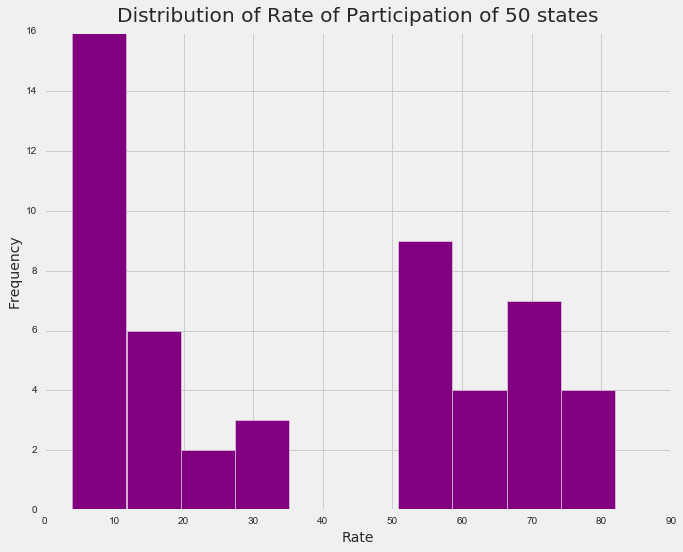

In [83]:
sat_scores = pd.read_csv('/Users/cguy/Downloads/sat_scores.csv')
sat_scores.columns = ['state', 'rate', 'verbal_score_mean', 'math_score_mean']
sat_scores.drop(51, inplace=True)
state = sat_scores.state.values
verbal = sat_scores.verbal_score_mean.values
math = sat_scores.math_score_mean.values
rate = sat_scores.rate.values

fig = sat_scores['rate'].hist(figsize=(10,8), color='purple')

plt.style.use('fivethirtyeight')

ax = plt.gca()

ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('Rate', fontsize=14)

fig.set_title('Distribution of Rate of Participation of 50 states', y=1.01)

##### 15. Plot the Math distribution

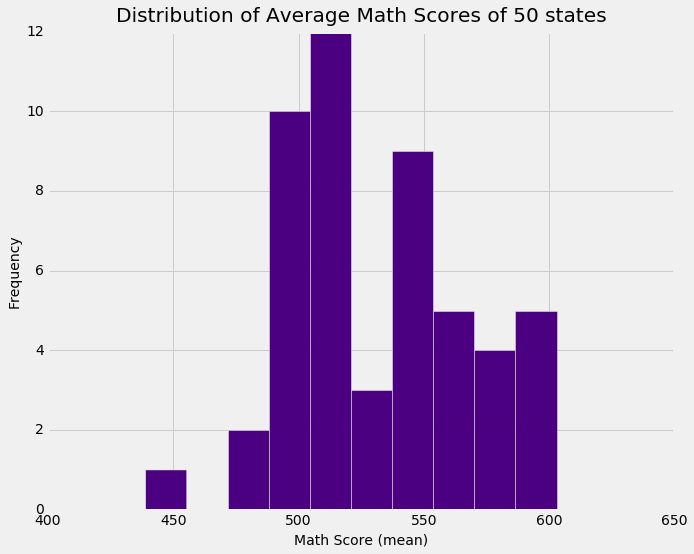

In [66]:
fig = sat_scores['math_score_mean'].hist(figsize=(10,8), color='indigo')

plt.style.use('fivethirtyeight')

ax = plt.gca()

ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('Math Score (mean)', fontsize=14)

fig.set_title('Distribution of Average Math Scores of 50 states', y=1.01)

##### 16. Plot the Verbal distribution

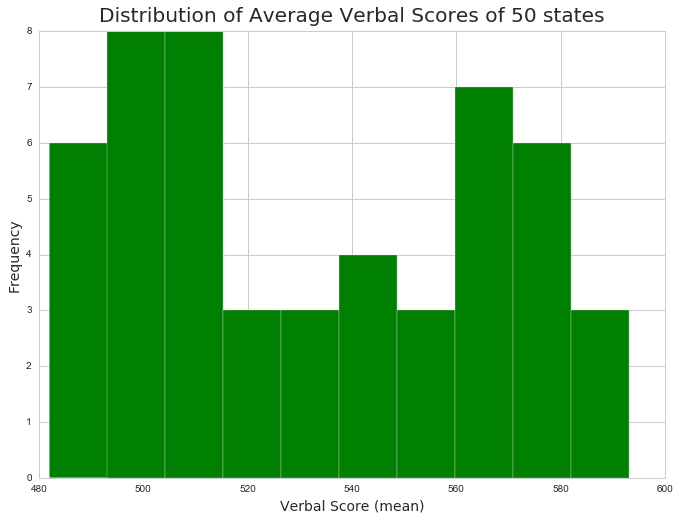

In [82]:
fig = sat_scores['verbal_score_mean'].hist(figsize=(10,8), color='green')

plt.style.use('fivethirtyeight')

ax = plt.gca()

ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlabel('Verbal Score (mean)', fontsize=14)

fig.set_title('Distribution of Average Verbal Scores of 50 states', y=1.01)

##### 17. What is the typical assumption for data distribution?

Typical assumption for data distribution is a normal distribution. A data set is normally distributed when the data itself follows a uni-modal bell-shaped curve that is symmetric about its mean. A normal distribution has a mean of 0 and a standard deviation of 1.

<i>Source: http://blog.minitab.com/blog/quality-data-analysis-and-statistics/assumptions-and-normality</i>

##### 18. Does that distribution hold true for our data?

No, the distributions for the three different variables in the data set (rate of participation, average verbal and math sat scores) were not distributed normally.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

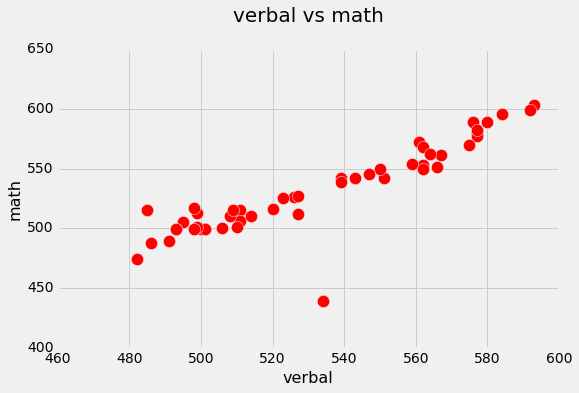

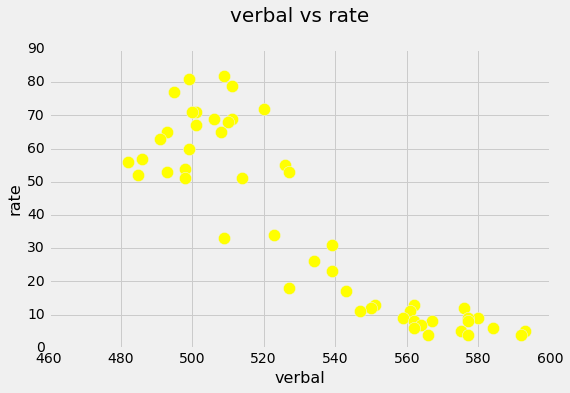

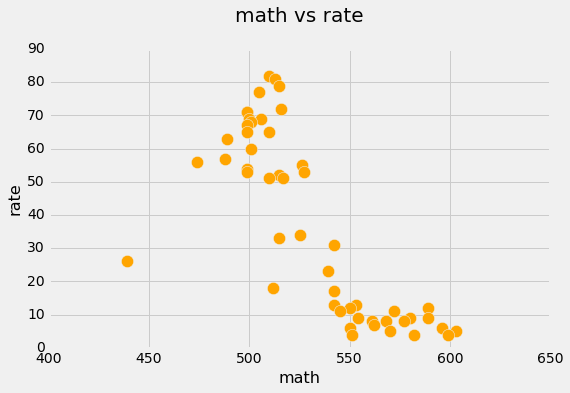

In [74]:
plt.style.use('fivethirtyeight')
fig_verbVSmath = plt.figure(figsize = (8, 5))
axes = fig_verbVSmath.gca()
axes.scatter(verbal, math, c = 'red', s = 150)
axes.set_title('verbal vs math\n', fontsize=20)
axes.set_xlabel('verbal', fontsize = 16)
axes.set_ylabel('math', fontsize = 16)

fig_verbVSrate = plt.figure(figsize = (8, 5))
axes = fig_verbVSrate.gca()
axes.scatter(verbal, rate, c = 'yellow', s = 150)
axes.set_title('verbal vs rate\n', fontsize=20)
axes.set_xlabel('verbal', fontsize = 16)
axes.set_ylabel('rate', fontsize = 16)

fig_mathVSrate = plt.figure(figsize = (8, 5))
axes = fig_mathVSrate.gca()
axes.scatter(math, rate, c = 'orange', s = 150)
axes.set_title('math vs rate\n', fontsize=20)
axes.set_xlabel('math', fontsize = 16)
axes.set_ylabel('rate', fontsize = 16)

##### 20. Are there any interesting relationships to note?

Yes. Looking at the 'verbal vs math' scatterplot (first figure in cell above), a strong positive correlation can be observed between the average verbal and math scores of the 50 states. There is one significant outlier that can be observed in this scatterplot. This particular outlier indicates that the state average verbal sat score was significntly better than that state's math score.

The other two scatterplots, 'verbal vs rate' and 'math vs rate', show the relationship between the rate of participation of each state with each of the average sat scores. These scatterplots depict a weaker (in terms of spread of the data), but observable, negative correlation between the rate and each of the average subject sat scores. 

##### 21. Create box plots for each variable. 



Rate boxplot:




{'boxes': [<matplotlib.lines.Line2D at 0x124148d50>],
 'caps': [<matplotlib.lines.Line2D at 0x124158c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x124164f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x124164950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x124148f50>,
  <matplotlib.lines.Line2D at 0x124158650>]}

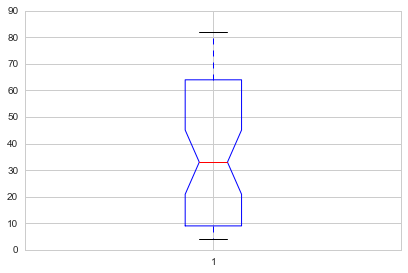

In [114]:
print
print
print "Rate boxplot:"
print
print
plt.boxplot(rate, dict_numerics)



Verbal boxplot:




{'boxes': [<matplotlib.lines.Line2D at 0x124088a90>],
 'caps': [<matplotlib.lines.Line2D at 0x1240979d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1240a1cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1240a1690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x124088c90>,
  <matplotlib.lines.Line2D at 0x124097390>]}

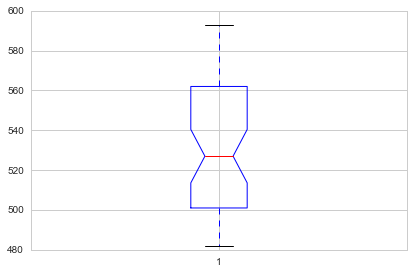

In [113]:
print
print
print "Verbal boxplot:"
print
print
plt.boxplot(verbal, dict_numerics)



Math boxplot:




{'boxes': [<matplotlib.lines.Line2D at 0x124459110>],
 'caps': [<matplotlib.lines.Line2D at 0x124466050>,
 'fliers': [<matplotlib.lines.Line2D at 0x124471350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x124466cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x124459310>,
  <matplotlib.lines.Line2D at 0x1244599d0>]}

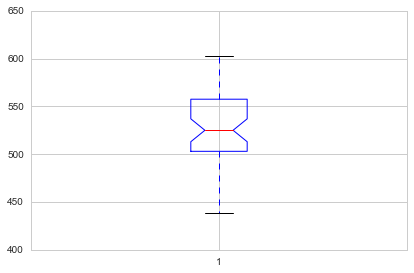

In [112]:
print
print
print "Math boxplot:"
print
print
plt.boxplot(math, dict_numerics)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 


Average Verbal Sat Score Heat Map:



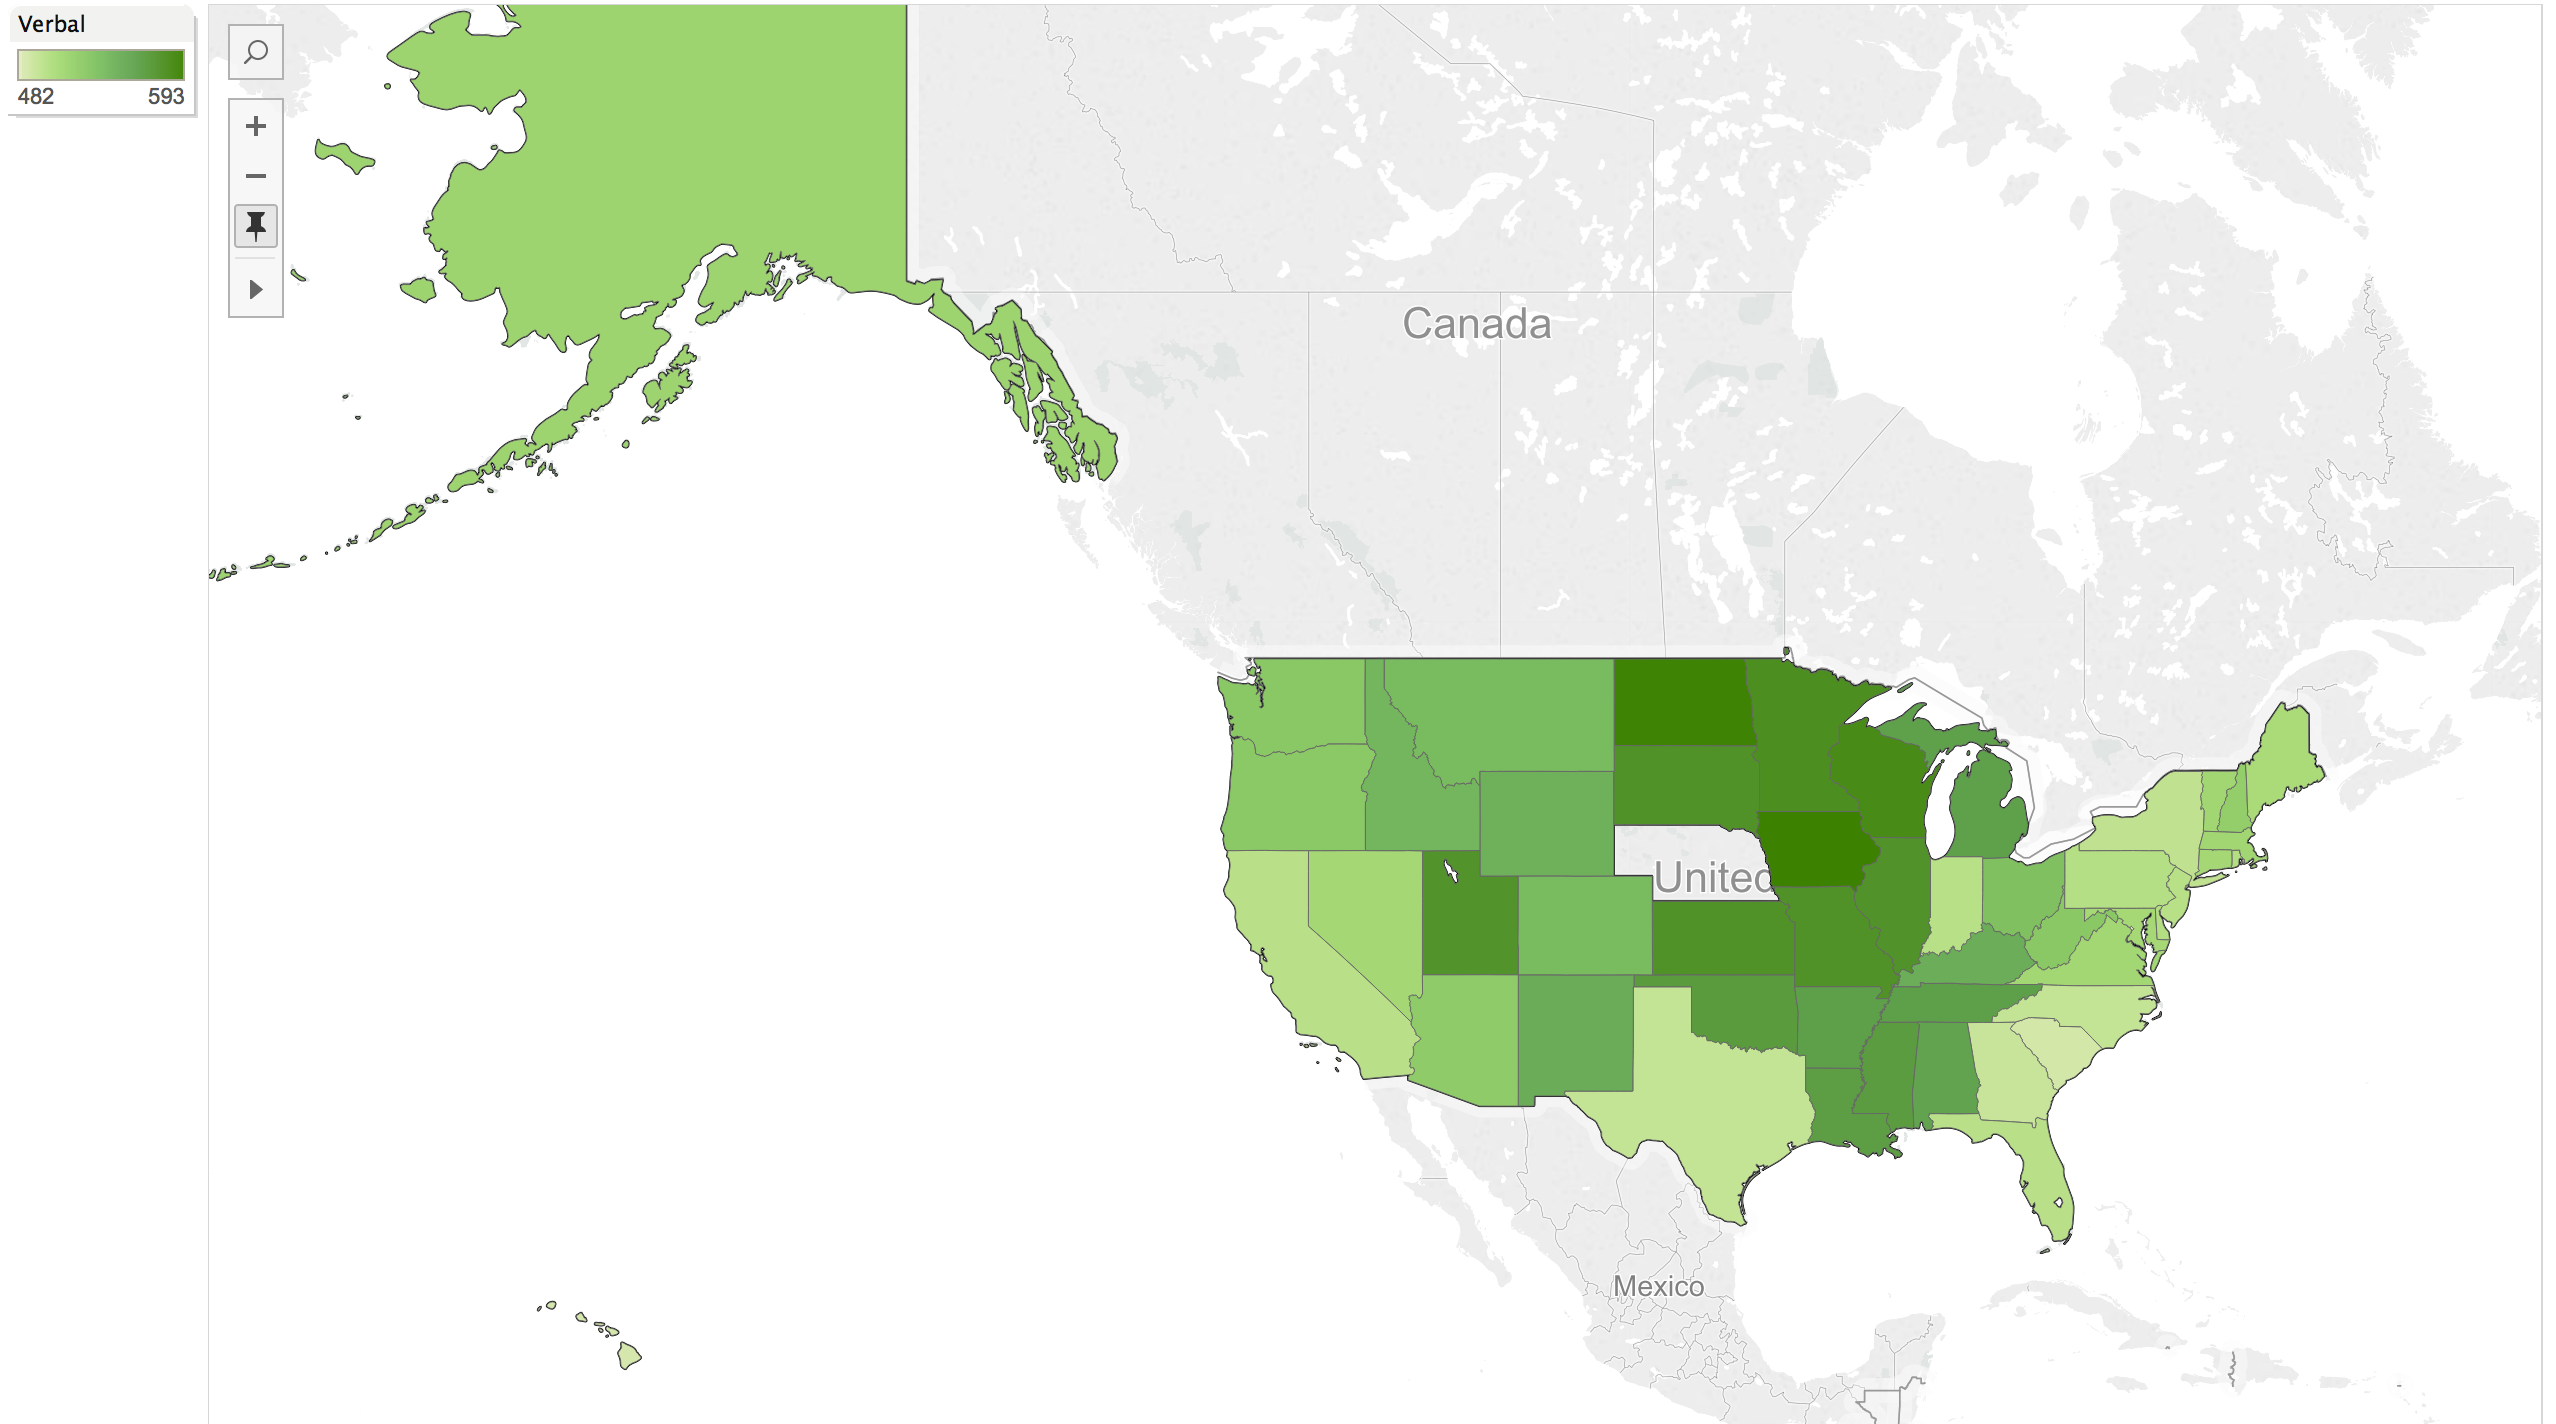

In [110]:
print
print "Average Verbal Sat Score Heat Map:"
print

from IPython.display import Image
Image(filename="/Users/cguy/Desktop/verbal_heatmap.png")




Average Math Sat Score Heat Map:




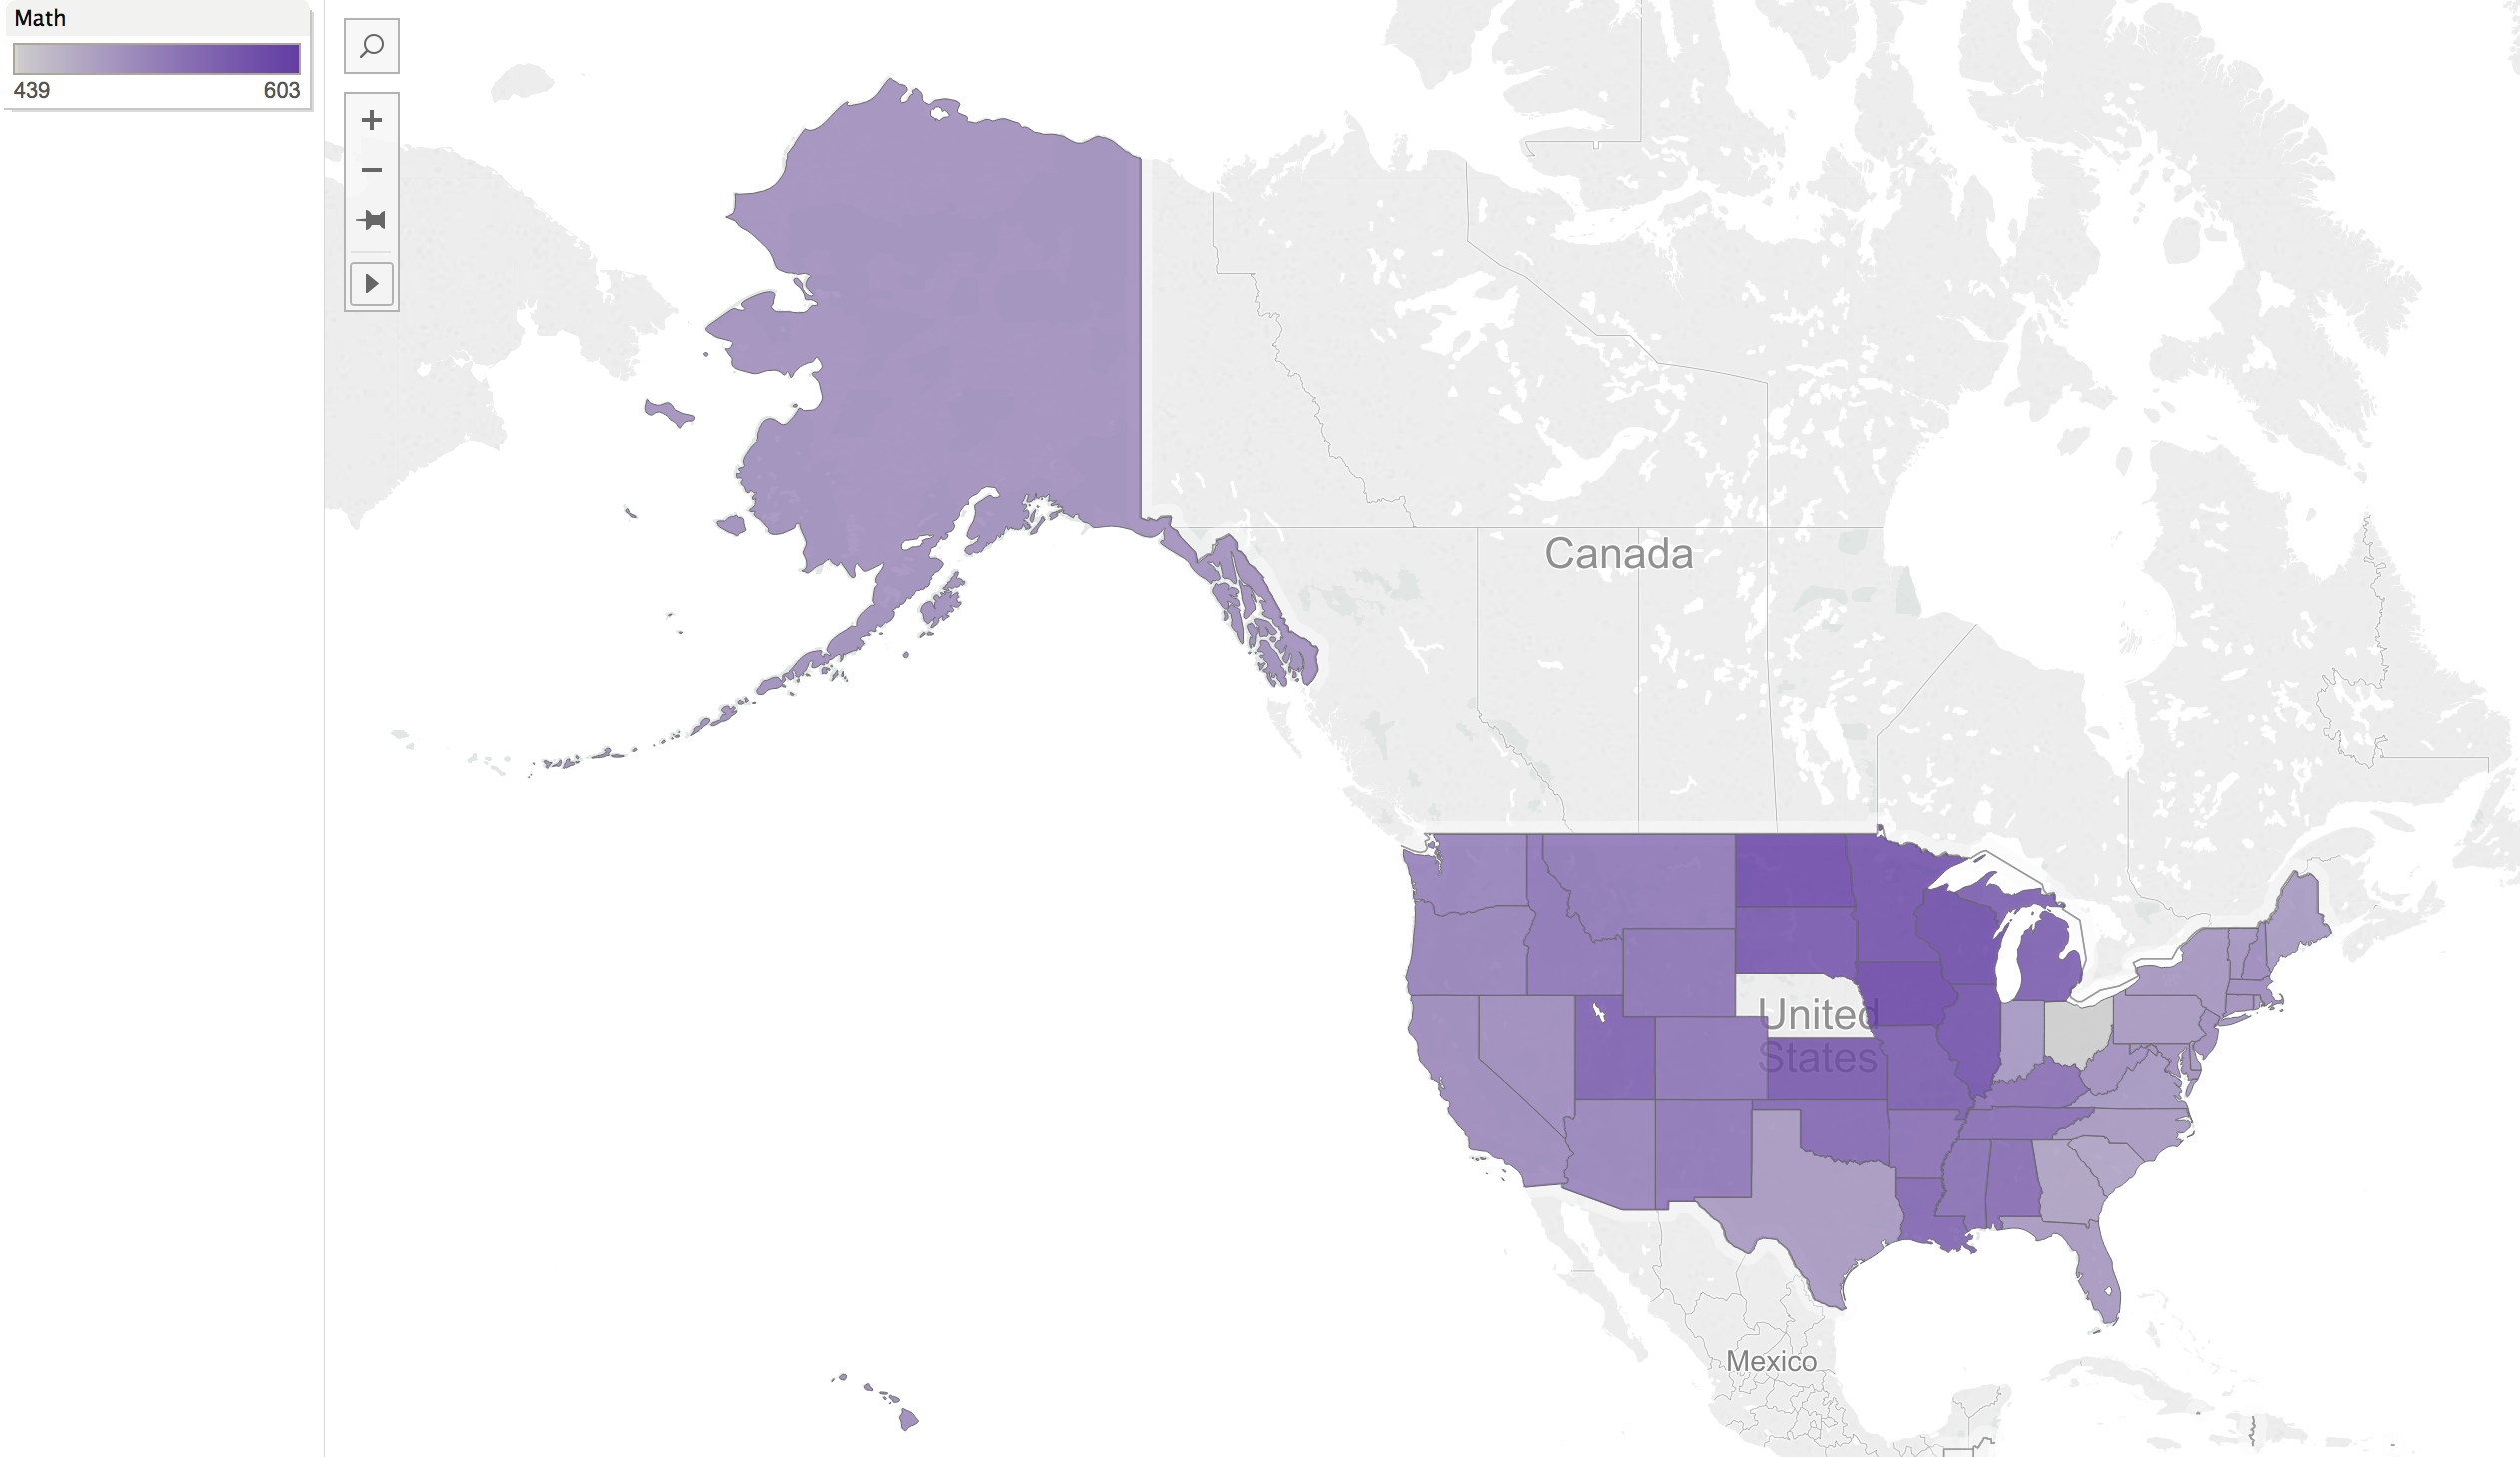

In [115]:
print
print
print "Average Math Sat Score Heat Map:"
print
print
from IPython.display import Image
Image(filename="/Users/cguy/Desktop/math_heatmap.png")



Average Rate Sat Score Heat Map: 




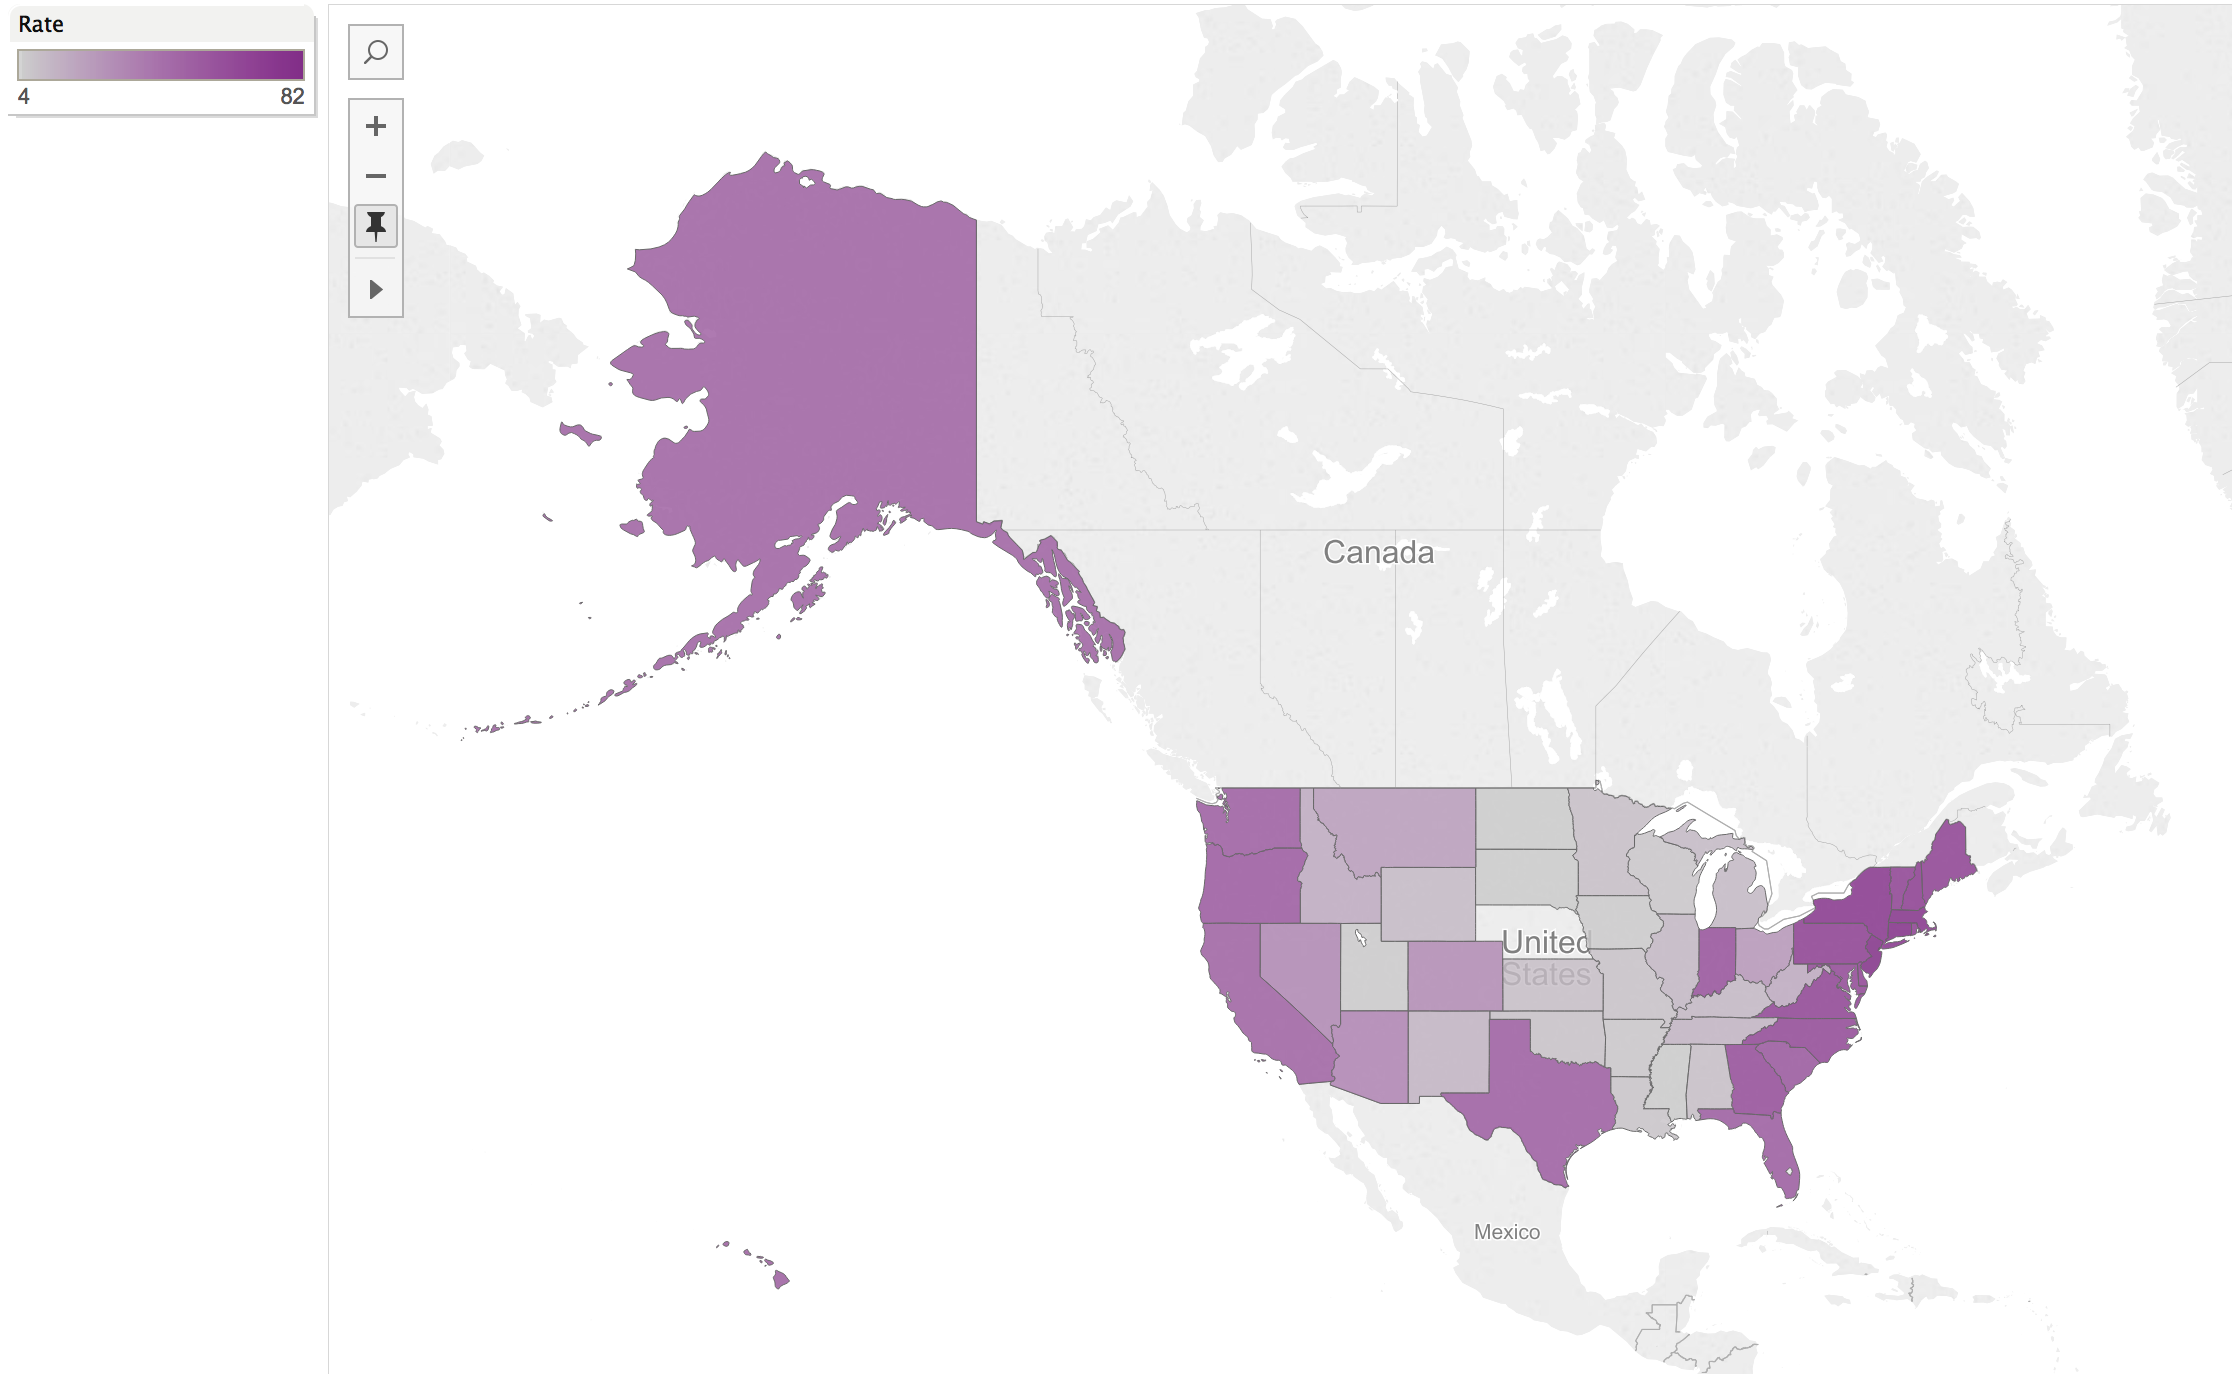

In [116]:
print
print
print "Average Rate Sat Score Heat Map: "
print
print
from IPython.display import Image
Image(filename="/Users/cguy/Desktop/rate_heatmap.png")